#Preamble

In [144]:
from google.colab import drive
import numpy as np
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For convenience, the `plot_silhouette` function discussed in class is below.

In [145]:
import matplotlib.cm as cm
def plot_silhouette(samples,
                    labels, 
                    ax=None,
                    cmap='Dark2'):
  if (ax is None):
    ax = plt.gca()

  # sort samples by label, and add index
  df = (np
     .c_[samples, labels]
     .view(dtype=[("samples", float), ("labels", float)]))
  df.sort(axis=0, order=["labels", "samples"])
  df = np.c_[df.view(float), np.arange(df.shape[0])]

  # bar plot
  z = ax.barh(df[:,2], df[:,0], 1)

  #color map for plotting
  cmap = cm.get_cmap(cmap)

  #set bar colors
  maxcluster = np.max(df[:, 1])
  for ix, k in enumerate(df):
    z[ix].set_color(cmap(k[1]/maxcluster))

  #label y axis ticks
  yticks = []
  yticklabels = []

  bounds = np.r_[np.argwhere(np.diff(df[:,1], prepend=[0]) > 0).ravel(), 
                 df.shape[0]].ravel()
  for ix, b in enumerate(bounds):
    low = bounds[ix - 1] if ix > 0 else 0
    high = b
    yticks.append((low + high)/2)
    yticklabels.append(df[low,1].astype(labels.dtype))

  #axis decorations
  bounds, yticks, yticklabels
  ax.set_yticks(yticks)
  ax.set_yticklabels(yticklabels)
  ax.grid()
  ax.set_ylabel("Cluster")
  ax.set_xlabel("Silhouette")
  return ax

# Problem 1

In the 602 shared drive, the file /data/cluster.txt contains a features matrix $\mathbf{X}\in\mathbb{R}^{10,000\times20}$.  (You can use `np.loadtxt` to read the file as a numpy matrix.)  This features was generated from scikit-learn's `make_blobs` function with parameters of `n_features=20` and centers uniformly distributed in $[-5, 5]$ along each axis.  The dataset was produced with at least 5 but no more than 15 clusters.  Find the number of clusters used to generate the dataset (i.e., $k$ that best clusters the data), and justify your conclusion using silhouette plots.


In [146]:
X = np.loadtxt('/content/drive/Shareddrives/DS602-S22/Data/cluster.txt')

In [147]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [148]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [149]:
kmeans = KMeans( init="random",n_clusters=5 ,n_init=10,max_iter=300,random_state=42 )

In [150]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

In [151]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

In [152]:
silhouette_coefficients = []
for k in range(5, 12):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_) 
  silhouette_coefficients.append(score)

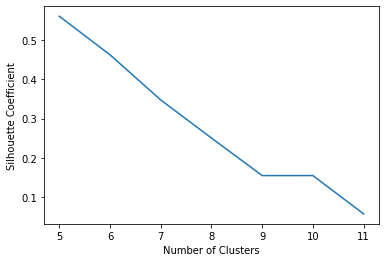

In [153]:
plt.plot(range(5, 12), silhouette_coefficients)
plt.xticks(range(5, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

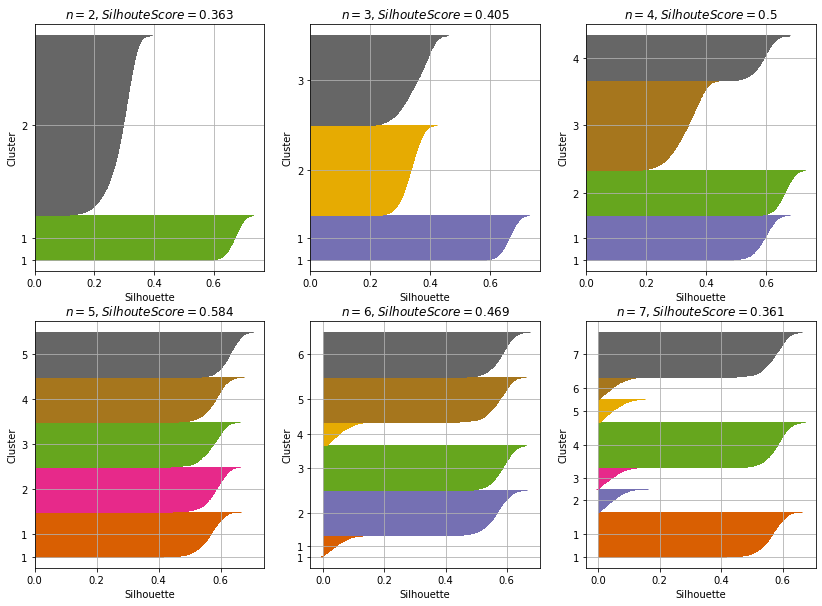

In [155]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_scores=[]
fig, ax = plt.subplots(2, 3, figsize=(14,10))
for x, ax in enumerate(ax.ravel()):
  clusters = x + 2
  K_Mean_Model = KMeans(clusters)
  K_Mean_Model.fit(X)
  labels_predict = K_Mean_Model.predict(X)
  silh_score = round(silhouette_score(X, labels_predict), 3)
  sil_scores.append(silh_score)
  sil_samp = silhouette_samples(X, labels_predict)
  plot_silhouette(sil_samp, clusters-labels_predict,cmap='Dark2', ax=ax)
  ax.set_title(f"$n={clusters},Silhoute Score={silh_score}$")

In [156]:
sil_scores 

[0.363, 0.405, 0.5, 0.584, 0.469, 0.361]

In [157]:
n=1
for i in range(0, len(sil_scores)):
  n+=1 
  print("For n=",n) 
  print("Silhouette Score is:",sil_scores[i])  

For n= 2
Silhouette Score is: 0.363
For n= 3
Silhouette Score is: 0.405
For n= 4
Silhouette Score is: 0.5
For n= 5
Silhouette Score is: 0.584
For n= 6
Silhouette Score is: 0.469
For n= 7
Silhouette Score is: 0.361


### From the above result we can see that highest Silhouette Score is for cluster n=5

# Problem 2
The Fashion-MNIST dataset is a dataset of 10,000 grayscale images of size $28\times28$.  Each image depicts an article of clothing.  Load the dataset from OpenML (the dataset name is "Fashion-MNIST") and retain only the first 5,000 images.  Find an optimal number of Gaussian components based on the Akaike Information Criterion (AIC), and use the AIC scores to cluster the data using a GMM.  Visually inspect the model outcomes.  Is the clustering the model selected meaningful (e.g., are the cluster separations intuitive)?

In [158]:
from sklearn.datasets import fetch_openml
X, _ = fetch_openml("Fashion-MNIST", return_X_y=True, as_frame=False)
# keep only the first 5,000 images
X = X[:5000,:]

In [159]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
import pandas as pd
recs = []
for n in range(2,9):
  gmm=GaussianMixture(n_components=n)
  gmm.fit(X)
  aic=gmm.aic(X)
  recs.append([n,gmm.aic(X)])
  print("For N =", n)
  print(f"AIC={aic}")

For N = 2
AIC=33131036.43801663
For N = 3
AIC=27831770.813545283
For N = 4
AIC=27499136.854878224
For N = 5
AIC=22947043.305536486
For N = 6
AIC=21659297.97748526
For N = 7
AIC=15931327.652368965
For N = 8
AIC=14118597.501585428


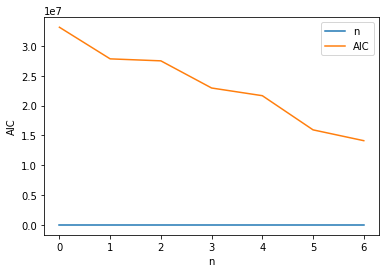

In [160]:
plt.plot(recs)
plt.legend(['n','AIC'])
plt.xlabel('n')
plt.ylabel("AIC")
plt.show()

In [161]:
gmm = GaussianMixture(n_components=2, n_init=10,verbose=3,verbose_interval=1)
y_pred = gmm.fit_predict(X)

Initialization 0
  Iteration 1	 time lapse 2.52425s	 ll change inf
  Iteration 2	 time lapse 1.16020s	 ll change 30.83206
  Iteration 3	 time lapse 1.13359s	 ll change 7.27401
  Iteration 4	 time lapse 1.12645s	 ll change 1.06202
  Iteration 5	 time lapse 1.15470s	 ll change 0.00000
Initialization converged: True	 time lapse 7.10024s	 ll -3189.70184
Initialization 1
  Iteration 1	 time lapse 2.58861s	 ll change inf
  Iteration 2	 time lapse 1.13168s	 ll change 30.77784
  Iteration 3	 time lapse 1.15176s	 ll change 7.10626
  Iteration 4	 time lapse 1.13193s	 ll change 0.79748
  Iteration 5	 time lapse 1.12439s	 ll change 0.00000
Initialization converged: True	 time lapse 7.12857s	 ll -3191.55714
Initialization 2
  Iteration 1	 time lapse 2.42167s	 ll change inf
  Iteration 2	 time lapse 1.11612s	 ll change 30.83206
  Iteration 3	 time lapse 1.13260s	 ll change 7.27401
  Iteration 4	 time lapse 1.79365s	 ll change 1.06202
  Iteration 5	 time lapse 1.13411s	 ll change 0.00000
Initializati

# Problem 3
Import the MNIST-784 dataset (handwritten numbers), and keep only observations labeled as "7".   Using an outlier detection method of your choice, identify outlier observations, i.e., observations that do not resemble other observations in the dataset.  Display a sample of 5-10 detected outlier observations.

In [162]:
x, labels= fetch_openml('mnist_784', version=1, return_X_y=True)

In [163]:
data = np.array(x.loc[labels=='7', :])

In [164]:
from sklearn.neighbors import LocalOutlierFactor
loc_out = LocalOutlierFactor(contamination=0.01)
outlier_scores=loc_out.fit_predict(data)

In [165]:
outliers = np.where(-1 == outlier_scores)
print("Number of outliers are",len(outliers[0]))

Number of outliers are 73


In [166]:
outliers[0]
sample = [data[x] for x in outliers[0]]
t = np.array(sample)
np.shape(t)

(73, 784)

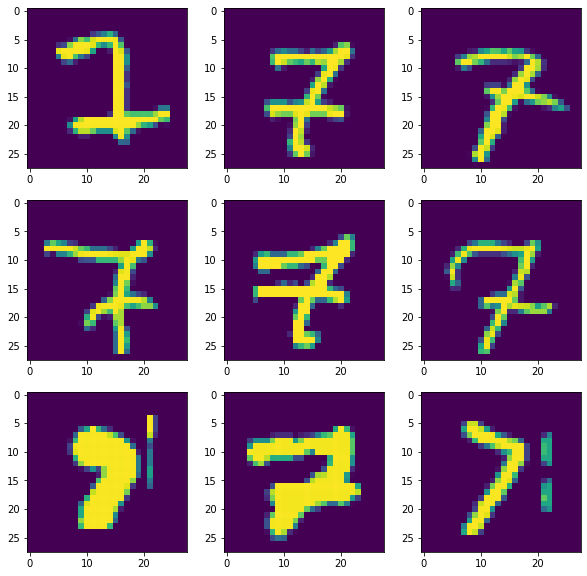

In [167]:
fig, axes = plt.subplots(3,3,figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(t[i].reshape((28,28)))
plt.show()